Binary Sentiment (Logistic Regression) (Task 4)

Note: User will have to upload the csv to their jupyter

In [24]:
import pandas as pd

#Will have to change the file name for the single large dataset
data= pd.read_csv("cleaned_data.csv")

#Testing if it read from the read_csv
print(data.head(2))
print("\n")


   rating                                    title_x  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   

                                                text images_x        asin  \
0  This spray is really nice. It smells really go...       []  B00YQ6X8EO   
1  This product does what I need it to do, I just...       []  B081TJ8YS3   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B00YQ6X8EO  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588687728923             0   
1  B081TJ8YS3  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588615855070             1   

   verified_purchase  ...                                             videos  \
0               True  ...  {'title': array(['Best Hair Product For Summer...   
1               True  ...  {'title': array(['Easy to apply!'], dtype=obje...   

                  store  categories  \
0             HERBIVORE          []   
1  Two Goats Apothecary          []   

           

Transform rating into:
Positive if rating > 3, Negative if rating ≤ 3

In [25]:
Positive = data[data["rating"]>3]
Negative = data[data["rating"]<=3]
print(Positive.shape, Negative.shape)

(149208, 28) (53647, 28)


In [26]:
#Imbalanced results thus 

Positive= Positive.head(Negative.shape[0])
print(Positive.shape, Negative.shape)

(53647, 28) (53647, 28)


In [27]:
print("Rating Before Transformation")
print(data["rating"].head(10))
print("\n")

data["rating"] = data["rating"].apply(lambda r: "Positive" if r > 3 else "Negative")

print("Rating Before Transformation")
print(data["rating"].head(10))
print("\n")

#Update the csv at source
data.to_csv("cleaned_data.csv", index= False)

Rating Before Transformation
0    5.0
1    4.0
2    5.0
3    1.0
4    5.0
5    4.0
6    5.0
7    3.0
8    5.0
9    5.0
Name: rating, dtype: float64


Rating Before Transformation
0    Positive
1    Positive
2    Positive
3    Negative
4    Positive
5    Positive
6    Positive
7    Negative
8    Positive
9    Positive
Name: rating, dtype: object




Part a. Train/Test Split: 80% train, 20% test, randomly shuffled.

Using "text" and "rating" from the dataset to predict whether "rating" would be "Positve" or "Negative" based on the "text"

In [28]:
from sklearn.model_selection import train_test_split

X = data["text"]
y= data["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10, shuffle= True) 

#Testing
print("Total amount of data: ", len(X))
print("The amount of data in trained split: ", len(X_train))
print("The amount of data in test split: ", len(X_test))
print("Dataset before shuffle : ", X.head(5).tolist())
print("Dataset after shuffle : ", X_train.head(5).tolist())
print("\n")


Total amount of data:  202855
The amount of data in trained split:  162284
The amount of data in test split:  40571
Dataset before shuffle :  ["This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)', 'Smells good, feels great!', 'Felt synthetic', 'Love it']
Dataset after shuffle :  ['this is the third time ordering this product', 'great stuff.  i always buy bulk but its nice to find this in a pinch.  thanks amazon and spir zon', 'These are the same gel packs that were used at the Chronic pain recovery center 

Part b. Text Vectorization: TF-IDF on review text (lowercase, split on whitespace/punctuation), discarding tokens in fewer than 5 reviews or in over 80% of reviews.

Preprocessing the text: lowercase, split on whitespace/punctuation

In [29]:
import re

print("Before preprocessing the text")
print(data["text"].head(2))
print("\n")

data["text"]= data["text"].apply(lambda word: re.findall(r'\b\w+\b', str(word).lower()))

print("After preprocessing the text")
print(data["text"].head(2))
print("\n")

#Update the csv at source
data.to_csv("cleaned_data.csv", index= False)

Before preprocessing the text
0    This spray is really nice. It smells really go...
1    This product does what I need it to do, I just...
Name: text, dtype: object


After preprocessing the text
0    [this, spray, is, really, nice, it, smells, re...
1    [this, product, does, what, i, need, it, to, d...
Name: text, dtype: object




TF-IDF on review text, discarding tokens in fewer than 5 reviews or in over 80% of reviews.


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(min_df=5, max_df=0.8)

#for missing values
X_train= X_train.fillna("")
X_test= X_test.fillna("")

X_train_tf_idf = tf_idf.fit_transform(X_train)
X_test_tf_idf = tf_idf.transform(X_test)

print("X_train_tf_idf", X_train_tf_idf.shape)
print("X_test_tf_idf", X_test_tf_idf.shape)

X_train_tf_idf (162284, 14336)
X_test_tf_idf (40571, 14336)


Part c. Classifier: Logistic Regression (default hyperparameters).

In [35]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()

model.fit(X_train_tf_idf, y_train)
prediction = model.predict(X_test_tf_idf)

for p in range(5):
    print(f"Review: {X_test.iloc[p]}")
    print(f"Predictions: {prediction[p]}")
    print("\n")

Review: It is very sheer and light without much coverage.  Don't buy if you are looking for a concealer.  Loved the applicator and the application
Predictions: Positive


Review: Easy To use and store
Predictions: Positive


Review: Works great
Predictions: Positive


Review: Did not come with the liquid monomer.
Predictions: Negative


Review: I judged this too soon. U can’t tell at first that the hair is being removed until u do it a few times. Then magically it’s all gone. A touch required every 2 - 3 months Voila
Predictions: Positive




Evaluation: Accuracy, F1 Score and Confusion Matrix (2×2: TP, FP, TN, FN)

Accuracy:  0.8851396317566735
F1 Score:  0.923375427519074
Confusion Matrix: 


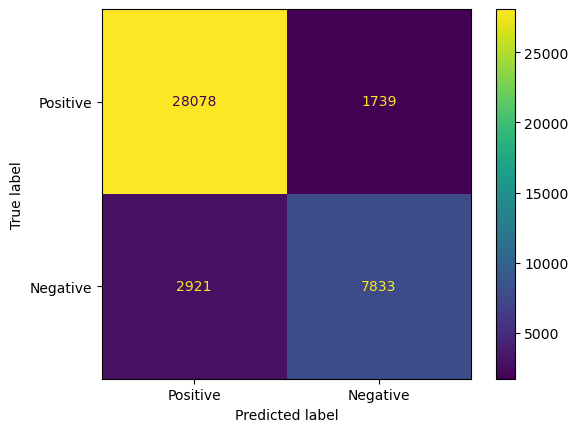

In [40]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

#Accuracy
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)

#F1 Score
f1_score=f1_score(y_test, prediction, pos_label="Positive")
print("F1 Score: ", f1_score)

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, prediction, labels=["Positive","Negative"])
#print("Confusion Matrix: ", confusion_matrix)

print("Confusion Matrix: ")
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Positive","Negative"])
confusion_matrix_display.plot()